In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn import neighbors
from Modul.load_img import load_img
from Modul.saver import saver
from Modul.camera import camera

### Load Image

In [3]:
ld = load_img()
my_camera = camera()
X, Y, df = ld.load_im('D:\\Study\\AI\\Project\\Detection_Ai\\image_training\\')

In [4]:
cnt = X.shape[0]
cnt

32

In [5]:
df

,Name,Quantity
0,Duy,11
1,Nu,11
2,Viet,10


### Add Image

In [5]:
X, Y, df = my_camera.add_face(name = "new", ld = ld)

saved
saved


In [6]:
X.shape

(34, 40000)

### PCA

(40000, 2)

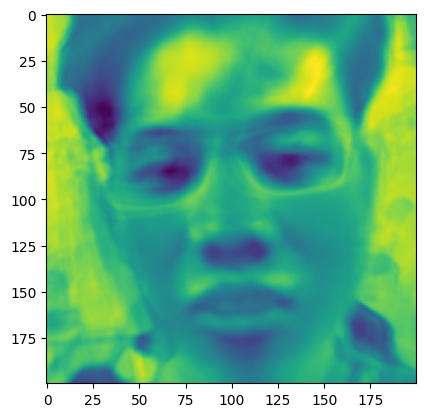

In [6]:
K = cnt
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

# projection matrix
U = pca.components_.T
plt.imshow(U[:,0].reshape(200,200))
U_mean = pca.mean_
U.shape

### Fit X_train

In [7]:
X_fit = pca.transform(X)
X_fit.shape

(32, 2)

### KNN

In [9]:
from sklearn import neighbors, datasets
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, p = 2)
clf.fit(X_fit, Y)

KNeighborsClassifier(n_neighbors=3)

### MY KNN

In [8]:
from Modul.my_knn import my_knn
my_clf = my_knn()

In [9]:
def predict_face_myknn(new_face):
    x_test_pca = pca.transform(new_face.reshape(1,200*200))
    y_predic = my_clf.predict(X_fit, Y, x_test_pca[0,:], 5)
    return y_predic

### Predcit

In [22]:
def predict_face(new_face):
    x_test_pca = pca.transform(new_face.reshape(1,200*200))
    y_predic = clf.predict(x_test_pca)
    return y_predic[0]

In [10]:
my_camera.detect_face(predicter = predict_face_myknn)